source of the dataset: https://www.kaggle.com/datasets/mexwell/body-measurements

### imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import keras
from keras import layers
from keras.models import Sequential

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random as rd

### constants

In [ ]:
DATA_PATH = "/content/bdims.csv" # change data path if needed
TEST_SIZE = 0.2
BATCH_SIZE = 8
EPOCHS = 100

### data preparation

In [ ]:
# all data are numeric
df = pd.read_csv(DATA_PATH)

# switching columns
columns = list(df.columns)
columns[-2], columns[-1] = columns[-1], columns[-2]
df = df[columns]

# separate for inputs and output
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# normalization of the input
X = (X - X.mean()) / X.std()

# convert to 2d array
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=42)

### model architecture and training

In [ ]:
model = Sequential(name="heigth_reggression")

model.add(layers.Input((X.shape[1], )))
model.add(layers.Dense(16, "relu"))
model.add(layers.Dense(8, "relu"))
model.add(layers.Dense(8, "relu"))
model.add(layers.Dense(y.shape[1]))

model.compile(optimizer="adam", loss="mean_absolute_error")
#model.summary()
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 170.0871 - val_loss: 170.8833
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.4323 - val_loss: 168.3670
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165.2195 - val_loss: 160.2641
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 152.9697 - val_loss: 136.6328
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.1084 - val_loss: 85.5459
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.3179 - val_loss: 72.5803
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.1974 - val_loss: 70.8658
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.9220 - val_loss: 68.5920
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.5164 - val_loss: 66.4360
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.5656 - val_loss: 63.7127
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.4146 - val_loss: 60.4949
Epoch 12/100
51/51 ━━━━━━━━━━━━━

### evaluation

In [ ]:
# evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2098 
Test Loss: 4.9532


### graph

[170.43893432617188, 168.8047637939453, 163.60739135742188, 146.78207397460938, 104.86678314208984, 71.55615234375, 67.95362091064453, 65.68577575683594, 63.54054641723633, 60.84173583984375, 58.10740280151367, 54.74191665649414, 51.2909049987793, 47.38179016113281, 43.81230545043945, 39.72793197631836, 35.7937126159668, 32.29485321044922, 29.867095947265625, 27.41146469116211, 25.39451026916504, 23.754070281982422, 22.752498626708984, 21.829940795898438, 21.25737190246582, 20.270845413208008, 19.509145736694336, 18.903240203857422, 18.247365951538086, 17.498313903808594, 16.896970748901367, 16.1711483001709, 15.475401878356934, 15.10720443725586, 14.523839950561523, 14.157266616821289, 13.443632125854492, 12.889944076538086, 12.474955558776855, 11.921052932739258, 11.618048667907715, 11.167675971984863, 10.684389114379883, 10.38115119934082, 9.943840980529785, 9.761651039123535, 9.908282279968262, 9.089654922485352, 8.738228797912598, 8.57750415802002, 8.297096252441406, 8.11928272247

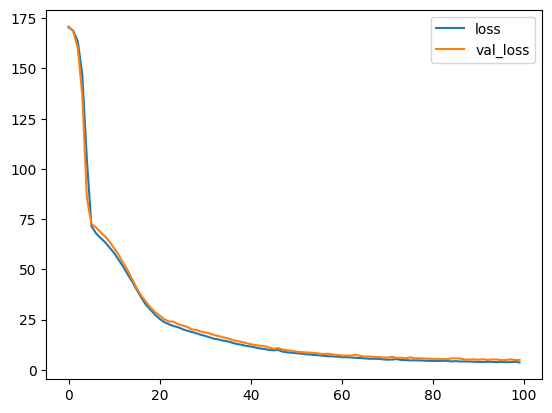

In [ ]:
print(history.history["loss"])

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### evaluation of results - predicted vs true

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


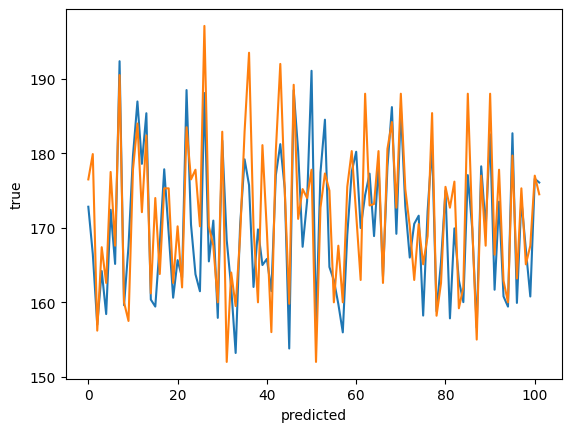

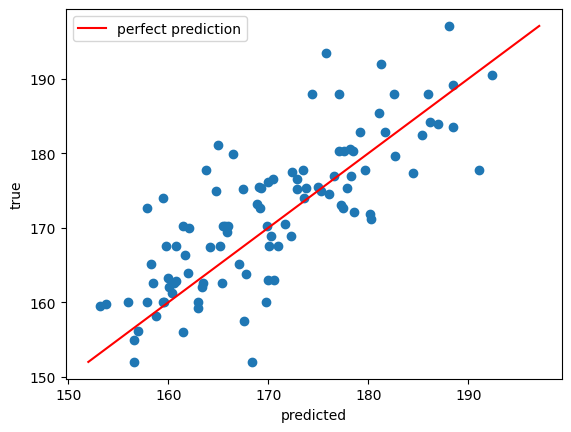

In [ ]:
predicted = model.predict(X_test)
actual = y_test

plt.plot(predicted)
plt.plot(actual)

plt.xlabel('predicted')
plt.ylabel('true')

plt.show()

plt.scatter(predicted, actual)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', label='perfect prediction')

plt.xlabel('predicted')
plt.ylabel('true')

plt.legend()
plt.show()

### demo

In [ ]:
idx = rd.randint(0, len(X_test))
print(f"the test sample index is:  {idx}")

input = X_test[idx]
input = np.expand_dims(X_test[idx], axis=0)

output = model.predict(input)
print(f"predicted output:   {output}")
print(f"expected output:    {y_test[idx]}")

the test sample index is:  8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
predicted output:   [[159.61513]]
expected output:    [160.]


### personal verdict
The network predicts human height according to various body measurements. Final test loss is about 5 cm, which I find pretty decent, considering the size of the dataset, which was not so large (about 500 rows).